<a href="https://colab.research.google.com/github/aboltCD/aboltCD/blob/main/GMM_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering con Gaussian Mixture Models

En este notebook realizaremos funciones de clustering de datos utilizando el dataset de fisher (Iris). Primero comenzamos importando las librerías necesarias

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.mixture import GaussianMixture 
from sklearn.datasets import load_iris

Gardamos los cuatro features originales del dataset (en este caso haremos clustering, por lo que el target no se usará)

In [45]:
iris = load_iris()
X = iris.data

Ahora agrupamos estos datos utilizando GMM. Sin embargo, tenemos que buscar dos hiperparámetros: n_components (el k) y covariance_type. En este caso probaremos con k desde 1 hasta 11:

In [46]:
resultados = [[]]

covariances = ['full', 'tied', 'diag', 'spherical']
for i in range(1, 11):
  temp = []
  for j in covariances:
    model = GaussianMixture(n_components = i, covariance_type = j, random_state = 0)
    model.fit(X)
    temp.append(model.bic(X))
  resultados.append(temp)

# Tratamiento de los resultados

Ahora visualizamos la tabla de los resultados. Primero, la podemos pasara un data frame de pandas


In [47]:
df = pd.DataFrame(resultados, columns = covariances)
df = df.dropna()
df['n_components'] = range(1, len(df) + 1)
print(df)


          full        tied         diag    spherical  n_components
1   829.978155  829.978155  1522.120153  1804.085438             1
2   574.017833  688.097220   857.551494  1012.235180             2
3   580.861278  633.846247   744.640361   853.823577             3
4   625.441241  618.038221   705.135926   784.932156             4
5   668.797968  665.304566   701.128283   743.710564             5
6   713.424574  624.797592   697.169253   706.311419             6
7   775.188440  618.656449   703.151267   714.239420             7
8   830.262285  623.236949   710.690965   694.519394             8
9   825.321198  649.714344   737.940544   717.186225             9
10  846.715717  669.887814   773.951775   733.451193            10


Ahora podemos encontrar los mejores hiperparámetros ploteando los rangos de valores de "n_components" y del tipo de covarianza:

Nota: el score incluido en el plot es el BIC score (Bayesian Information Criterion)

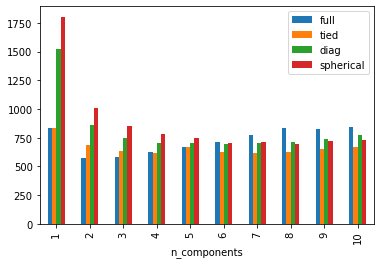

In [48]:
df.plot(x="n_components", y=["full", "tied", "diag", "spherical"], kind="bar")

#Visualizando GMM Clustering

Ahora que elegimos el mejor k, podemos visualizar nuestro clústering. Primero creamos nuestro modelo de clústering:

In [49]:
model = GaussianMixture(n_components = 3, covariance_type = 'full', random_state = 0)
y_pred = model.fit_predict(X)

Y ahora lo visualizamos con respecto a dos variables. Es importante recordar incluir los centroides en la visualización. El científico debe darle una interpretación a cáda clúster. En este caso, se relaciona a cada especie:

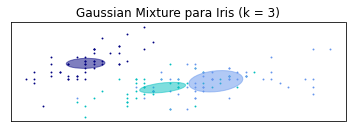

In [54]:
#Función de utilidad para plotear distribuciones normales en un gráfico:

import itertools

import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn import mixture

color_iter = itertools.cycle(['navy', 'c', 'cornflowerblue', 'gold',
                              'darkorange'])
def plot_results(X, Y_, means, covariances, index, title):
    splot = plt.subplot(2, 1, 1 + index)
    for i, (mean, covar, color) in enumerate(zip(
            means, covariances, color_iter)):
        v, w = linalg.eigh(covar)
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        u = w[0] / linalg.norm(w[0])
        # as the DP will not use every component it has access to
        # unless it needs it, we shouldn't plot the redundant
        # components.
        if not np.any(Y_ == i):
            continue
        plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], .8, color=color)

        # Plot an ellipse to show the Gaussian component
        angle = np.arctan(u[1] / u[0])
        angle = 180. * angle / np.pi  # convert to degrees
        ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
        ell.set_clip_box(splot.bbox)
        ell.set_alpha(0.5)
        splot.add_artist(ell)

    plt.xticks(())
    plt.yticks(())
    plt.title(title)


plot_results(X, y_pred, model.means_, model.covariances_, 0,
             'Gaussian Mixture para Iris (k = 3)')
